In [2]:
import pandas as pd

# Load the CSV file (you may need to specify encoding="ISO-8859-1")
df = pd.read_csv('/Users/amritminocha/Desktop/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', header=None)

# Assign column names
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Quick look
print(df.head())

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [3]:
print(df['target'].value_counts())

target
0    800000
4    800000
Name: count, dtype: int64


### Clean the tweet text for modeling.
#### - remove URLs
#### - remove mentions
#### - remove hashtags
#### - remove special characters and numbers

### Convert target to binary

In [4]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)  
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean_text)

df['label'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amritminocha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   
3          ElleCTF    my whole body feels itchy and like its on fire    
4           Karoli  @nationwideclass no, it's not behaving at all....   

                                          clean_text  label  
0  awww thats bummer shoulda got david carr third...      0  
1  upset cant update facebook texting might cr

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# Labels
y = df['label']

print(X.shape)

(1600000, 5000)


In [6]:
# The output value -> (0, 1072) means 0th row 1072 column which means 1072th column words out of 5000 features has tf-idf value 0.2 something
print(X)

  (0, 1072)	0.2022059522593894
  (0, 4355)	0.43525088314850735
  (0, 1070)	0.38502835636990573
  (0, 1798)	0.21798867276958758
  (0, 3824)	0.478554381481773
  (0, 599)	0.4067014663331926
  (0, 4332)	0.25192085396416264
  (0, 276)	0.34061566245484975
  (1, 441)	0.3459118204500027
  (1, 114)	0.25579893757830585
  (1, 4413)	0.17851966325254992
  (1, 3697)	0.22942534573460108
  (1, 3555)	0.3745153726427564
  (1, 994)	0.2925753923967987
  (1, 2728)	0.2586727297713326
  (1, 4318)	0.36723428155196647
  (1, 1460)	0.29403925773138545
  (1, 4616)	0.2935998272393082
  (1, 656)	0.1797308481873239
  (1, 4627)	0.3127440037554583
  (2, 1768)	0.22506485250168215
  (2, 3551)	0.36703910640206716
  (2, 3680)	0.41458284571599624
  (2, 2621)	0.4579295443870856
  (2, 309)	0.444421378783451
  :	:
  (1599994, 4948)	0.2963413177925768
  (1599994, 4856)	0.4088594085064174
  (1599994, 4708)	0.34076110574742496
  (1599994, 1783)	0.21795704505051744
  (1599994, 4874)	0.2374719009665092
  (1599994, 4396)	0.24336775

In [7]:
dense_sample = X[:5].todense()
print(dense_sample)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print(X, y)

  (0, 1072)	0.2022059522593894
  (0, 4355)	0.43525088314850735
  (0, 1070)	0.38502835636990573
  (0, 1798)	0.21798867276958758
  (0, 3824)	0.478554381481773
  (0, 599)	0.4067014663331926
  (0, 4332)	0.25192085396416264
  (0, 276)	0.34061566245484975
  (1, 441)	0.3459118204500027
  (1, 114)	0.25579893757830585
  (1, 4413)	0.17851966325254992
  (1, 3697)	0.22942534573460108
  (1, 3555)	0.3745153726427564
  (1, 994)	0.2925753923967987
  (1, 2728)	0.2586727297713326
  (1, 4318)	0.36723428155196647
  (1, 1460)	0.29403925773138545
  (1, 4616)	0.2935998272393082
  (1, 656)	0.1797308481873239
  (1, 4627)	0.3127440037554583
  (2, 1768)	0.22506485250168215
  (2, 3551)	0.36703910640206716
  (2, 3680)	0.41458284571599624
  (2, 2621)	0.4579295443870856
  (2, 309)	0.444421378783451
  :	:
  (1599994, 4948)	0.2963413177925768
  (1599994, 4856)	0.4088594085064174
  (1599994, 4708)	0.34076110574742496
  (1599994, 1783)	0.21795704505051744
  (1599994, 4874)	0.2374719009665092
  (1599994, 4396)	0.24336775

### Splitting data into training and testing set

Training set (X_train, y_train) → Used to fit the model.

Testing set (X_test, y_test) → Used to evaluate performance on new, unseen data.

This helps prevent overfitting (model doing well only on training data) and gives a realistic measure of model accuracy.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Model Training (Logistic Regression)
Regression - type of supervised learning (learning is done on labelled data, so we know the ans before) - models the relationship between input features (X) and a continuous output (Y) - Eg. Predicting house price based on area, number of rooms, etc.

Linear Regression -  models a straight-line relationship between inputs and output

Logistic Regression - used for classification, not regression - called “regression” because it’s based on a linear model, but it uses a logistic (sigmoid) function to convert the result into a probability between 0 and 1 - 
If sigmoid(z) > 0.5 → class 1 (positive sentiment)

If sigmoid(z) < 0.5 → class 0 (negative sentiment)

### How LogisticRegression.fit(X_train, y_train) Works

1. Input:

X_train: A matrix of numerical features, in your case a TF-IDF matrix (sparse).
Each row = one tweet,
Each column = one word/token (up to 5000 if max_features=5000)
Each cell = importance of that word in that tweet (the TF-IDF score)

y_train: A vector of labels (0 for negative, 1 for positive)

✔️ Think of one row in X_train as:
```
Tweet → [0, 0.3, 0, 0, 0.7, 0, ..., 0.5]  → y = 1
```

2. Model Goal: Learn a weight for each feature/word.

z = w1x1 + w2x2 + w3x3 + ... + b (bias)

then apply sigmoid function:

sigmoid(z) = 1/1+e(pow(-z))

This gives a probability between 0 and 1 that the tweet is positive.


### Example

Tweet → [0, 0.3, 0, 0, 0.7, 0, ..., 0.5] → y = 1

Let’s assume this tweet has only 3 non-zero TF-IDF values for simplicity:

Feature Index	TF-IDF Value (x)
x₁	0.3
x₂	0.7
x₃	0.5

Model Will Learn Weights:
The model learns one weight (w) per feature. Example:

Feature Index	Weight (w)
w₁	1.2
w₂	-0.8
w₃	0.5

Also, there's a bias term (b). Let’s say:
b = 0.3

z=0.36−0.56+0.25+0.3=0.35

sigmoid(0.35) = 1/1+e(-35) = 0.587

### Note
- TF-IDF tells us how important a word is in a tweet

- For weights:
The model’s job is to learn how important each word (feature) is for predicting the sentiment.

So during training, Logistic Regression tries many combinations of weights w₁, w₂, ..., wₙ and bias b that best separate positive and negative tweets.

For example, maybe:

- w_love = +1.2 → because the word “love” appears in positive tweets

- w_bad = -1.0 → because “bad” shows up in negative tweets

These weights are initialized randomly and updated by the model during training using gradient descent, minimizing error on predictions.

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.774559375
Precision: 0.762693823365844
Recall: 0.79714375
F1-score: 0.779538363276869

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.80      0.78    160000

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



In [19]:
results_df = pd.DataFrame({
    'text': df['text'].iloc[y_test.index],
    'clean_text': df['clean_text'].iloc[y_test.index],
    'actual': y_test,
    'predicted': y_pred
})
# pd.set_option('display.max_colwidth', None)
results_df
# results_df.to_csv("sentiment_predictions.csv", index=False)

,text,clean_text,actual,predicted
291262,"@30STM_Denalie yes! black and red are my fav colors, i really wanted them and those colors def looks awesome on Jared",yes black red fav colors really wanted colors def looks awesome jared,0,1
1359075,qu buy OPEN HOUSE THIS WEEKEND 11AM-4PM. Best Value One Bedroom in LIC! (Long Island City) $395000 1bd: http://tinyurl.com/pt8nqd,qu buy open house weekend ampm best value one bedroom lic long island city bd,1,1
1009651,"@GinoandFran Fran, can you greet me on air??? If that's okay. HAHAHAHA. THANKS !",fran greet air thats okay hahahaha thanks,1,1
1538714,"@mangelanchez OMG, thats awesome! Goood luck! U can meet caaute calgary boys buying themselves clothes, and tell them all about me LOL",omg thats awesome goood luck u meet caaute calgary boys buying clothes tell lol,1,1
1046690,@Sumana_Raja hahahhaha! That is a very good point.,hahahhaha good point,1,1
...,...,...,...,...
203556,Beautiful not shit weather! So happy to see it. No MoD practice today So instead cleaning and relaxation. Maybe driving range later...,beautiful shit weather happy see mod practice today instead cleaning relaxation maybe driving range later,0,1
163122,@gedhead if only @stephenfry wouldn't have some fiftythousand followers... hugh laurie's just a needle in a haystack now!,wouldnt fiftythousand followers hugh lauries needle haystack,0,1
1176116,"@LA__Brat following you in here also, i hope you will atleast get this, also wishes for getting well soon !",following also hope atleast get also wishes getting well soon,1,0
477177,I feel like we haven't had a decent swell since last fall. And no hope of waves for Myrtle Beach this week either at least there is golf.,feel like havent decent swell since last fall hope waves myrtle beach week either least golf,0,0


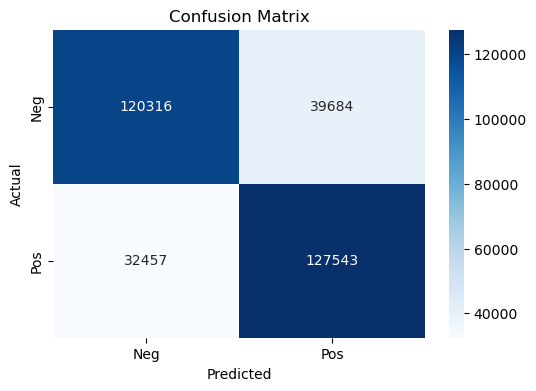

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Correct Predictions (diagonal)
# 120,316 = True Negatives → Model correctly predicted negative sentiment when it was actually negative

# 127,543 = True Positives → Model correctly predicted positive sentiment when it was actually positive

### Model Training using Naive Bayes

#### Naive Bayes
A probabilistic classification algorithm based on Bayes' Theorem.

This theorem helps us find the probability of a label (like positive or negative) given some evidence (like words in a tweet):

    - P(Label|Features) = P(Features|Label).P(Label) / P(Features)

    - P(Label | Features) → Probability that a tweet is positive given the words in it.

    - P(Features | Label) → How likely those words are if the tweet is positive.

    - P(Label) → Probability of tweet being positive overall.

    - P(Features) → Overall probability of those words appearing (used for normalization).

**Naive → Because it assumes independence between features.**

**How It Thinks:**
Let’s say we’re classifying a tweet:

“I love this product!”

Naive Bayes will:

Look at each word ("I", "love", "this", "product")

Check how likely that word is in positive tweets vs. negative tweets from the training data

Multiply all those individual probabilities for each class (positive, negative)

Choose the class with the highest resulting probability

So it picks the label (positive or negative) that is most probable given the words in the tweet.

In [21]:
# MultinomialNB, the standard variant for discrete features like word counts or TF-IDF.
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
# It's best suited for word count or TF-IDF based text data
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Make predictions on the test set
y_nb_pred = nb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_nb_pred))  # Overall correctness of predictions
print("Precision:", precision_score(y_test, y_nb_pred))  # How many predicted positives were actually positive
print("Recall:", recall_score(y_test, y_nb_pred))  # How many actual positives were captured
print("F1-score:", f1_score(y_test, y_nb_pred))  # Harmonic mean of precision and recall

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_nb_pred))


Accuracy: 0.757159375
Precision: 0.760676883699419
Recall: 0.7504125
F1-score: 0.7555098303868915

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76    160000
           1       0.76      0.75      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



### Confusion Matrix Visualization for Naive Bayes

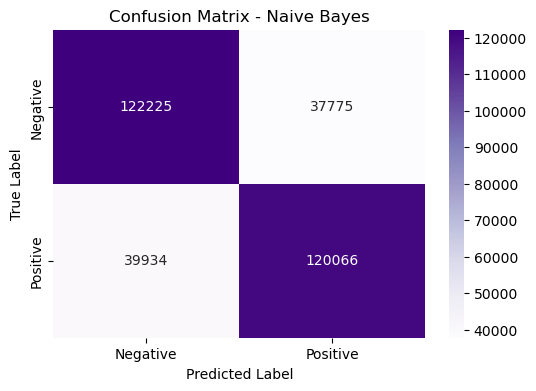

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
# This shows counts of: true positives, false positives, true negatives, and false negatives
cm_nb = confusion_matrix(y_test, y_nb_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Correct Predictions (diagonal)
# 122,225 = True Negatives → Model correctly predicted negative sentiment when it was actually negative

# 120,066 = True Positives → Model correctly predicted positive sentiment when it was actually positive

### A word cloud for the most common words used in positive vs negative feedback.

In [27]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 2.7 MB/s eta 0:00:00 0:00:01


In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get cleaned text for each sentiment
positive_text = df[df['label'] == 1]['clean_text'].str.cat(sep=' ')
negative_text = df[df['label'] == 0]['clean_text'].str.cat(sep=' ')

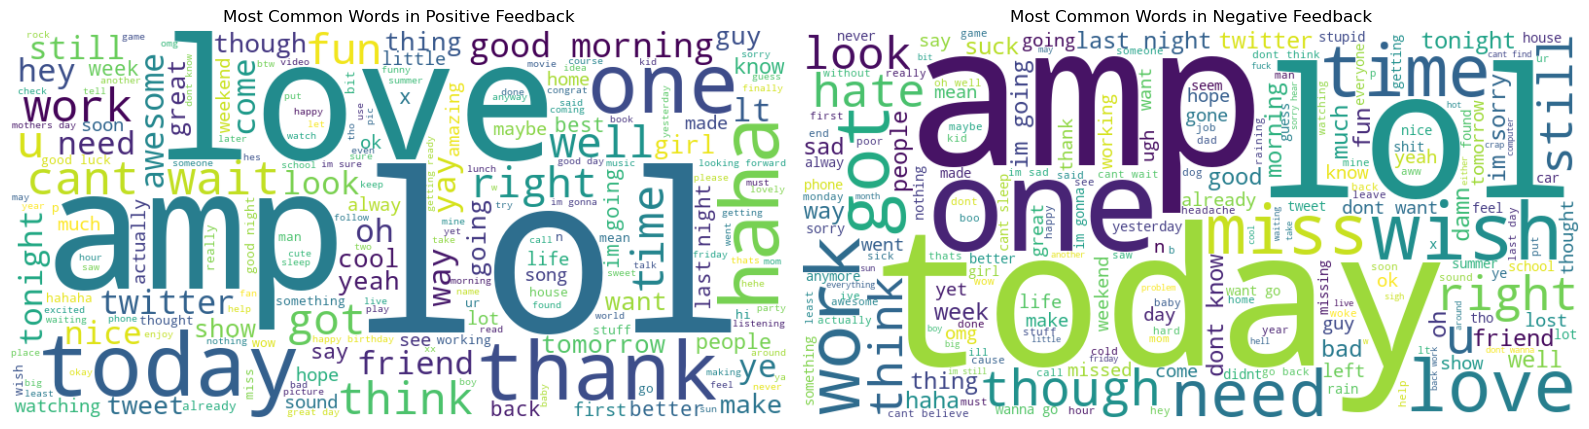

In [31]:
# Create WordCloud objects
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot side-by-side
plt.figure(figsize=(16, 8))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Feedback')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Feedback')

plt.tight_layout()
plt.show()


### Hyperparametre Tuning

- Hyperparameters are settings you choose before training (like how fast the model learns, or how deep a decision tree should go).

- Tuning means trying different combinations to see which gives the best result

We use tools like GridSearchCV or RandomizedSearchCV to automate this trial-and-error process which:

- Split your training data into cross-validation folds
- Try different parameter combinations
- Pick the one that performs best on average

### GridSearchCV

- It is a tool from scikit-learn used to automatically find the best hyperparameters for a machine learning model.
- Taking a list (or grid) of hyperparameter combinations.
- Training and validating the model for each combination.
- Selecting the one that gives the best performance on validation data.

Brute-force search over a parameter grid — it tries every combo

### GridSearchCV for Logistic Regression

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid to search over
lr_params = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # 'l1' works only with solvers like 'liblinear'
    'solver': ['lbfgs', 'liblinear']  # solvers that support the penalty
}

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Perform grid search with 3-fold cross-validation and F1-score as evaluation
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
lr_grid.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Logistic Regression Params:", lr_grid.best_params_)
best_lr_model = lr_grid.best_estimator_

# Evaluate
y_lr_pred = best_lr_model.predict(X_test)
print("Tuned LR F1-score:", f1_score(y_test, y_lr_pred))
print("\nClassification Report:\n", classification_report(y_test, y_lr_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned LR F1-score: 0.7795604288141602

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.80      0.78    160000

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



### GridSearchCV for Naive Bayes

In [37]:
# Define parameter grid
nb_params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0]  # Smoothing parameter
}

# Initialize model
nb = MultinomialNB()

# Setup GridSearchCV
nb_grid = GridSearchCV(estimator=nb, param_grid=nb_params, 
                       cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit to training data
nb_grid.fit(X_train, y_train)

# Best parameters and estimator
print("Best NB Params:", nb_grid.best_params_)
best_nb_model = nb_grid.best_estimator_

# Evaluate
y_nb_pred_tuned = best_nb_model.predict(X_test)
print("Tuned NB F1-score:", f1_score(y_test, y_nb_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_nb_pred_tuned))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best NB Params: {'alpha': 5.0}
Tuned NB F1-score: 0.7558364349726363

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76    160000
           1       0.76      0.75      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

